In [1]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.models import Model
from keras.preprocessing import image
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Load Pre-trained model from model zoo

We load the pre-trained VGG16 model from the Keras model zoo and list out the various layers in it.

First time you invoke the VGG16 constructor, it will download the trained model to ~/.keras/models.

Looks like there is 5 blocks of convolution+pooling followed by 2 fully connected layers.

In [2]:
vgg16_model = VGG16(weights='imagenet', include_top=True)
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
vgg16_model.compile(optimizer=sgd, loss='categorical_crossentropy')
# vgg16_model.summary()

In [3]:
for i, layer in enumerate(vgg16_model.layers):
    print("{:3d}\t{:20s}\t{:s}".format(i, layer.name, vgg16_model.layers[i].output_shape))

  0	input_1             	(None, 224, 224, 3)
  1	block1_conv1        	(None, 224, 224, 64)
  2	block1_conv2        	(None, 224, 224, 64)
  3	block1_pool         	(None, 112, 112, 64)
  4	block2_conv1        	(None, 112, 112, 128)
  5	block2_conv2        	(None, 112, 112, 128)
  6	block2_pool         	(None, 56, 56, 128)
  7	block3_conv1        	(None, 56, 56, 256)
  8	block3_conv2        	(None, 56, 56, 256)
  9	block3_conv3        	(None, 56, 56, 256)
 10	block3_pool         	(None, 28, 28, 256)
 11	block4_conv1        	(None, 28, 28, 512)
 12	block4_conv2        	(None, 28, 28, 512)
 13	block4_conv3        	(None, 28, 28, 512)
 14	block4_pool         	(None, 14, 14, 512)
 15	block5_conv1        	(None, 14, 14, 512)
 16	block5_conv2        	(None, 14, 14, 512)
 17	block5_conv3        	(None, 14, 14, 512)
 18	block5_pool         	(None, 7, 7, 512)
 19	flatten             	(None, 25088)
 20	fc1                 	(None, 4096)
 21	fc2                 	(None, 4096)
 22	predictions         	

## Visualizing Inputs and Outputs

We take an input image and look at what it turns into after the first 2 layers of convolution and pooling.

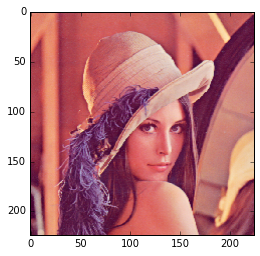

In [4]:
lena = image.load_img("../data/lena.png", target_size=(224, 224))
plt.imshow(lena)
lena = image.img_to_array(lena)
lena = np.expand_dims(lena, axis=0)
lena = preprocess_input(lena)

In [5]:
model = Model(input=vgg16_model.input, 
              output=vgg16_model.get_layer('block1_pool').output)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

block1_pool_features = model.predict(lena)
block1_pool_features.shape

(1, 112, 112, 64)

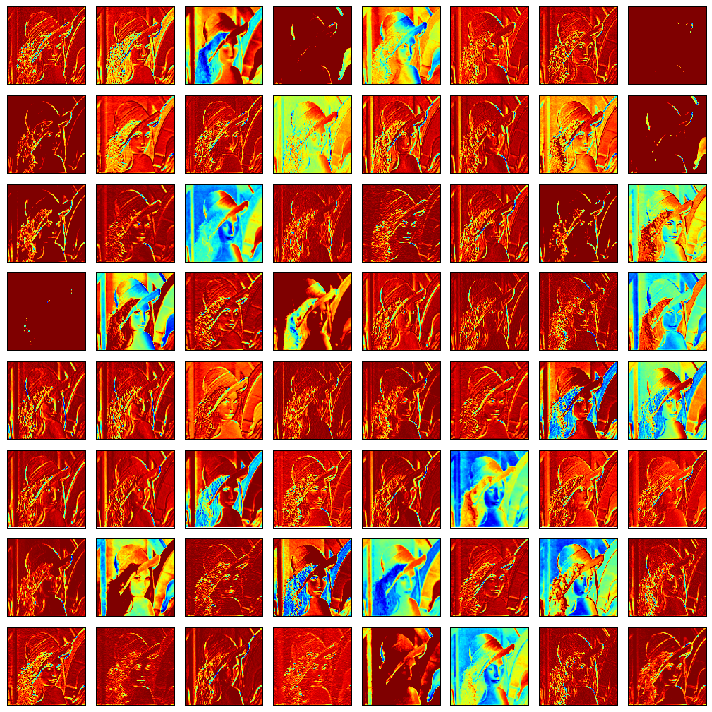

In [6]:
fig, axes = plt.subplots(8, 8, figsize=(10, 10))
axes = np.ravel(axes)
for i in range(block1_pool_features.shape[3]):
    axes[i].imshow(255-block1_pool_features[0, :, :, i], interpolation="nearest")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

In [7]:
model = Model(input=vgg16_model.input, 
              output=vgg16_model.get_layer('block2_pool').output)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

block2_pool_features = model.predict(lena)
block2_pool_features.shape

(1, 56, 56, 128)

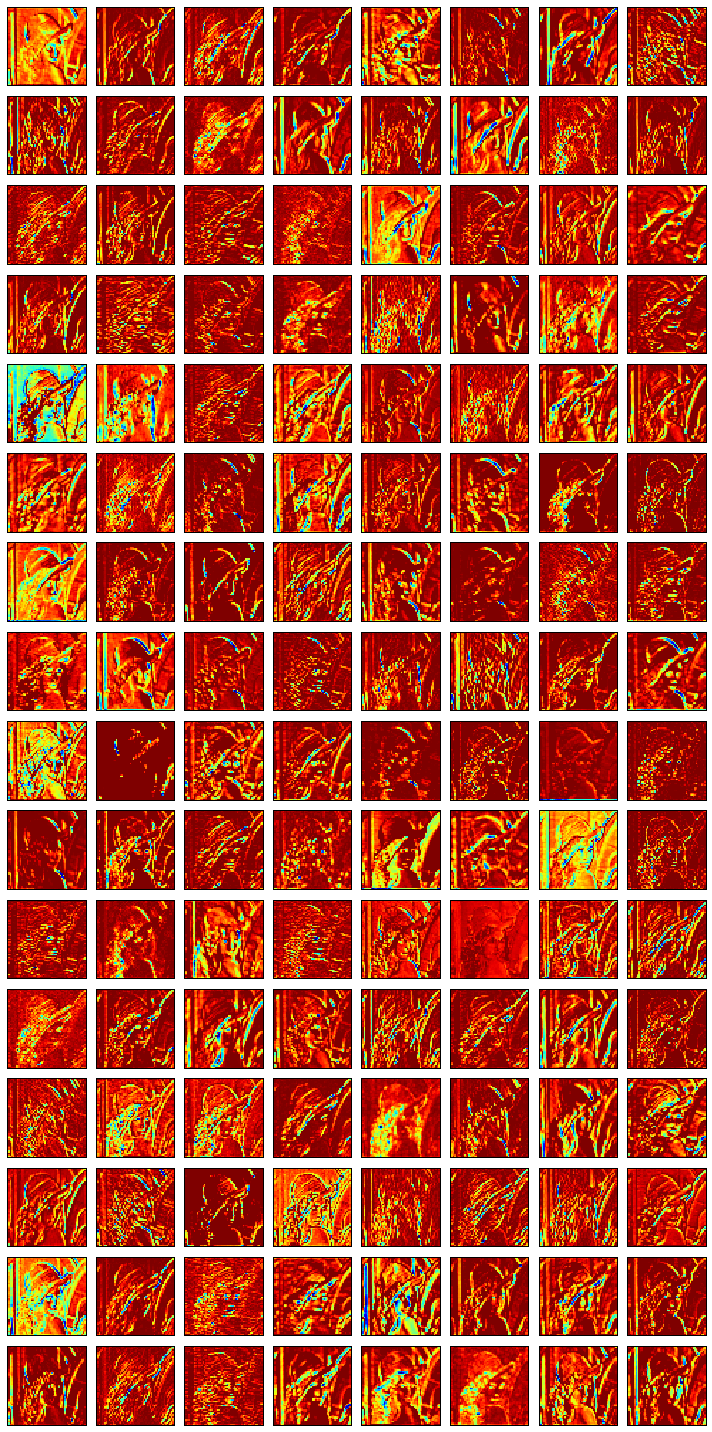

In [8]:
fig, axes = plt.subplots(16, 8, figsize=(10, 20))
axes = np.ravel(axes)
for i in range(block2_pool_features.shape[3]):
    axes[i].imshow(255-block2_pool_features[0, :, :, i], interpolation="nearest")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

## Visualizing Model Weights

In [9]:
W_b1c1 = vgg16_model.layers[1].get_weights()[0]
print(W_b1c1.shape)

(3, 3, 3, 64)


In [10]:
def visualize_weights(W, rows, cols):
    Wr = np.reshape(W, (W.shape[0], W.shape[1], 1, W.shape[2]*W.shape[3]))
    fig, axes = plt.subplots(rows, cols, figsize=(8, 8))
    axes = np.ravel(axes)
    imax = min(Wr.shape[3], rows * cols)
    for i in range(imax):
        w = Wr[:, :, 0, i]
        axes[i].imshow(w, interpolation="nearest", cmap="coolwarm")
        axes[i].set_xticks([])
        axes[i].set_yticks([])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.show()

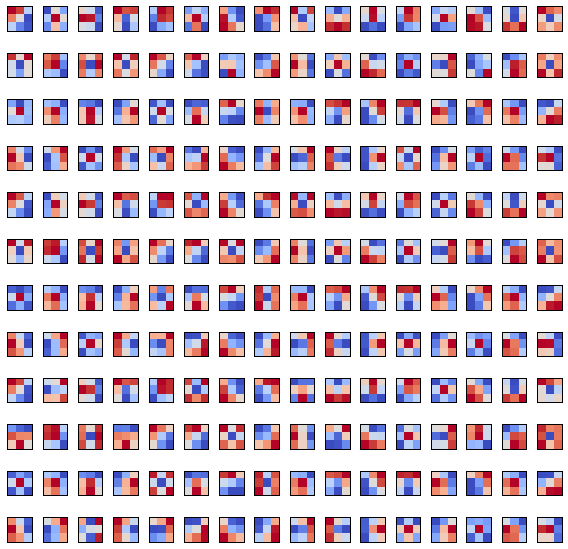

In [11]:
visualize_weights(W_b1c1, 12, 16)

In [12]:
W_b2c1 = vgg16_model.layers[4].get_weights()[0]
print(W_b2c1.shape)

(3, 3, 64, 128)


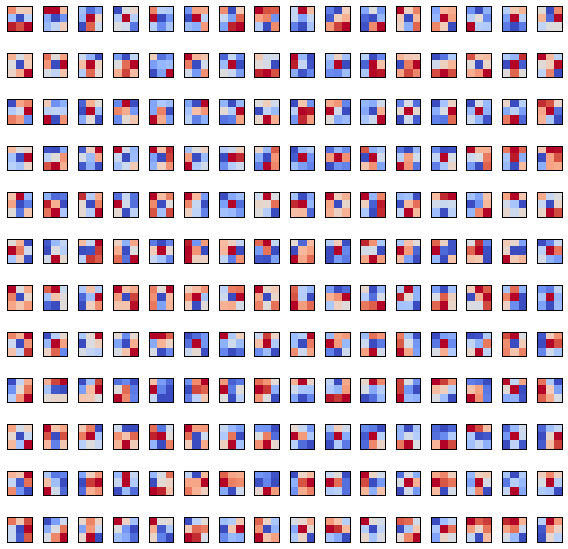

In [13]:
visualize_weights(W_b2c1, 12, 16)   # show the first 128 of 8,192 filters

In [14]:
W_b5c1 = vgg16_model.layers[15].get_weights()[0]
print(W_b5c1.shape)

(3, 3, 512, 512)


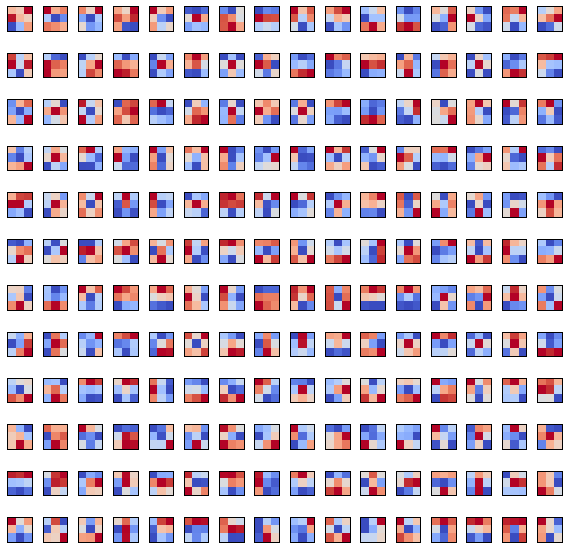

In [15]:
visualize_weights(W_b5c1, 12, 16)  # show first 128 of 262,144 filters